In [1]:
import numpy as np
import pandas as pd

### `Q-1:` Write a program to create an empty series.

In [3]:
empty = pd.Series([],dtype='object')
empty

Series([], dtype: object)

### `Q-2:` Write a Pandas program to add, subtract, multiple and divide two Pandas Series.

In [6]:
def Arithmatic(a,b,sign):
    if sign == '+':
        return a + b
    elif sign == '-':
        return a - b
    elif sign == '*':
        return a * b
    else:
        return a / b
a_series = pd.Series([1,2,3,4,5])
b_series = pd.Series([6,7,8,9,10])
Arithmatic(a_series,b_series,'*')

0     6
1    14
2    24
3    36
4    50
dtype: int64

### `Q-3` Write a Pandas program to compare the elements of the two Pandas Series.
Sample Series: [2, 4, 6, 8, 10], [1, 3, 5, 7, 10]



In [7]:
a_series = pd.Series([2, 4, 6, 8, 10])
b_series = pd.Series([1, 3, 5, 7, 10])
print(a_series == b_series)
print(a_series < b_series)
print(a_series > b_series)

0    False
1    False
2    False
3    False
4     True
dtype: bool
0    False
1    False
2    False
3    False
4    False
dtype: bool
0     True
1     True
2     True
3     True
4    False
dtype: bool


### `Q-5.`Write a function to change the data type of given a column or a Series. Function takes series and data type as input, returns the converted series.
```
series = pd.Series([1,2,'Python', 2.0, True, 100])
change to float type data
```
Note: Read about pd.to_numeric()

In [21]:
series = pd.Series([1,2,'Python', 2.0, True, 100])
print(series)
def change_dtype(series,data):
    return pd.to_numeric(series,errors='coerce',downcast=data)
change_dtype(series,'float')

0         1
1         2
2    Python
3       2.0
4      True
5       100
dtype: object


0      1.0
1      2.0
2      NaN
3      2.0
4      1.0
5    100.0
dtype: float32

### `Q-6` Find top 10 most run getter from the series.

In [55]:
batsman = pd.read_csv('batsman_runs_series.csv')
batsman

,batter,batsman_run
0,A Ashish Reddy,280
1,A Badoni,161
2,A Chandila,4
3,A Chopra,53
4,A Choudhary,25
...,...,...
600,Yash Dayal,0
601,Yashpal Singh,47
602,Younis Khan,3
603,Yuvraj Singh,2754


In [56]:
batsman.sort_values(by='batsman_run',ascending=False).head(10)

,batter,batsman_run
569,V Kohli,6634
462,S Dhawan,6244
130,DA Warner,5883
430,RG Sharma,5881
493,SK Raina,5536
27,AB de Villiers,5181
108,CH Gayle,4997
339,MS Dhoni,4978
452,RV Uthappa,4954
256,KD Karthik,4377


### `Q-7` No of players having runs above 3000

In [70]:
batsman[batsman['batsman_run'] > 3000].count()['batter']

20

In [71]:
batsman[batsman['batsman_run'] > 3000].shape[0]

20

### `Q-8` No of players having runs above mean value?

In [76]:
batsman[batsman['batsman_run'] > batsman['batsman_run'].mean()].shape[0]

128

### `Q-9` 
    i. Read `items.csv` making `item_name` as index.
    ii. Show no of nan values
    ii. Item price is given in $, so convert it to rupees without currency symbol.
    iii. Make data type of newly made series as float.
    iv. Fill nan with mean of the series


How csv file looks

```
item_name	item_price
Chips and Fresh Tomato Salsa	$2.39
Izze	$3.39
Nantucket Nectar	$3.39
Chips and Tomatillo-Green Chili Salsa	$2.39
Chicken Bowl	$16.98

```

In [97]:
item = pd.read_csv('items.csv',index_col='item_name').squeeze('columns')
item.head()

item_name
Chips and Fresh Tomato Salsa              $2.39 
Izze                                      $3.39 
Nantucket Nectar                          $3.39 
Chips and Tomatillo-Green Chili Salsa     $2.39 
Chicken Bowl                             $16.98 
Name: item_price, dtype: object

In [98]:
item.isna().sum()

50

In [110]:
x = item[1]
x[0:2]

'$3'

In [122]:
def rupees(x):
    try:
        y = x[1:]
    except:
        y = x
    return float(y)*83
item_rupees = item.apply(rupees)
item_rupees

item_name
Chips and Fresh Tomato Salsa              198.37
Izze                                      281.37
Nantucket Nectar                          281.37
Chips and Tomatillo-Green Chili Salsa     198.37
Chicken Bowl                             1409.34
                                          ...   
Steak Burrito                             975.25
Steak Burrito                             975.25
Chicken Salad Bowl                        933.75
Chicken Salad Bowl                        726.25
Chicken Salad Bowl                        726.25
Name: item_price, Length: 4622, dtype: float64

In [116]:
def data(x):
    try:
        y = x[1:]
    except:
        y = x
    return float(y)
items = item.apply(data)
items

item_name
Chips and Fresh Tomato Salsa              2.39
Izze                                      3.39
Nantucket Nectar                          3.39
Chips and Tomatillo-Green Chili Salsa     2.39
Chicken Bowl                             16.98
                                         ...  
Steak Burrito                            11.75
Steak Burrito                            11.75
Chicken Salad Bowl                       11.25
Chicken Salad Bowl                        8.75
Chicken Salad Bowl                        8.75
Name: item_price, Length: 4622, dtype: float64

In [123]:
item_rupees.fillna(items.mean())

item_name
Chips and Fresh Tomato Salsa              198.37
Izze                                      281.37
Nantucket Nectar                          281.37
Chips and Tomatillo-Green Chili Salsa     198.37
Chicken Bowl                             1409.34
                                          ...   
Steak Burrito                             975.25
Steak Burrito                             975.25
Chicken Salad Bowl                        933.75
Chicken Salad Bowl                        726.25
Chicken Salad Bowl                        726.25
Name: item_price, Length: 4622, dtype: float64

### `Q-10`: 
    i. Find mean price
    ii. Find 30th and 6th percentile value
    iii. Plot Histogram on price with bin size 50
    iv. No of items price lies between [1000 to 2000]



In [124]:
print(item_rupees.mean())

619.4316141732284


In [132]:
print(item_rupees.quantile(q=0.3))
print(item_rupees.quantile(q=0.06))

369.35
103.75


<Axes: ylabel='Frequency'>

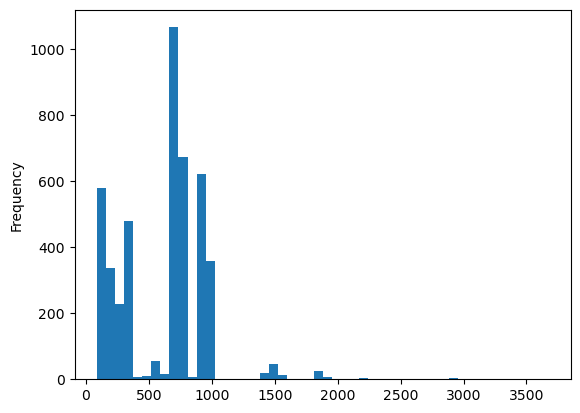

In [135]:
item_rupees.plot.hist(bins=50)

In [139]:
item_rupees[item_rupees.between(1000,2000)]

item_name
Chicken Bowl           1409.34
Chicken Salad Bowl     1867.50
Steak Burrito          1492.34
Chicken Burrito        1452.50
Chicken Bowl           1452.50
                        ...   
Chicken Bowl           1867.50
Steak Bowl             1950.50
Chicken Bowl           1452.50
Chips and Guacamole    1477.40
Chicken Salad Bowl     1452.50
Name: item_price, Length: 116, dtype: float64